In [12]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv(r'E:\Certification_Courses\Simplilearn\Deep_Learning\dataset\House Loan Data Analysis_Dataset\loan_data.csv')

In [14]:
print(f'shape: ---> {df.shape}')
df.head()

shape: ---> (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
pd.set_option('display.max_rows',None)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [17]:
100* df.isnull().sum()/df.shape[0]

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [18]:
#col_to_drop = list(df.columns[df.isnull().sum()/df.shape[0]*100 > 60]) or
col_to_drop = df.columns[100 * df.isnull().mean() > 60].to_list()
df = df.drop(columns = col_to_drop, axis=1)

In [19]:
df.shape

(307511, 105)

### Handling Missing values

In [20]:
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [21]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['int64','float64']:
            mean_val = df[col].mean()
            df[col] = df[col].fillna(value=mean_val)
        if df[col].dtype in ['object']:
            mode = df[col].mode()[0]
            df[col] = df[col].fillna(value=mode)   

In [22]:
df.isnull().sum().sum()

0

### Finding column with zero variance

In [23]:
zero_var_cols = [col for col in df.columns if df[col].nunique() <= 1]
print(zero_var_cols)

[]


### Correlation

In [24]:
corr = df.select_dtypes(include='number').corr().abs()

## getting the upper triangle
upper = np.triu(corr,k=1)  #k=1 removes diagonal
upper_df = pd.DataFrame(data=upper,index = df.select_dtypes(include='number').columns, columns = df.select_dtypes(include='number').columns)

In [25]:
to_drop = [col for col in upper_df.columns if (upper_df[col] > 0.9).any()]

In [26]:
to_drop

['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LANDAREA_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE']

In [27]:
upper_df

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,0.0,0.002108,0.001129,0.001820,0.000343,0.000433,0.000232,0.000849,0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,2.486236e-03,2.040093e-03,1.952612e-03,4.516280e-04,9.535961e-04,4.334531e-03
TARGET,0.0,0.000000,0.019187,0.003982,0.030369,0.012817,0.039628,0.037227,0.078239,0.044932,...,0.007952,0.001358,0.000215,0.003709,8.478053e-04,2.464258e-03,7.177650e-04,1.135579e-02,1.842386e-03,1.816014e-02
CNT_CHILDREN,0.0,0.000000,0.000000,0.012882,0.002145,0.021374,0.001826,0.025573,0.330938,0.239818,...,0.004031,0.000864,0.000988,0.002450,3.827907e-04,3.417239e-04,2.276822e-03,1.010140e-02,7.323678e-03,3.883426e-02
AMT_INCOME_TOTAL,0.0,0.000000,0.000000,0.000000,0.156870,0.191657,0.159600,0.074796,0.027261,0.064223,...,0.003130,0.002408,0.000242,0.000589,6.909242e-04,2.868087e-03,2.325737e-03,2.406300e-02,4.734061e-03,1.138830e-02
AMT_CREDIT,0.0,0.000000,0.000000,0.000000,0.000000,0.770127,0.986588,0.099738,0.055436,0.066838,...,0.034329,0.021082,0.031023,0.016148,3.653596e-03,3.963947e-03,1.192458e-03,5.093388e-02,1.489646e-02,4.531801e-02
AMT_ANNUITY,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.774661,0.118424,0.009445,0.104331,...,0.009745,0.004573,0.011718,0.017598,3.565420e-03,2.017909e-03,1.281519e-02,3.614812e-02,9.347827e-03,1.045214e-02
AMT_GOODS_PRICE,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103482,0.053416,0.064826,...,0.032748,0.020279,0.031640,0.014345,3.025294e-03,4.374208e-03,9.399637e-04,5.275511e-02,1.536376e-02,4.766921e-02
REGION_POPULATION_RELATIVE,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029582,0.003980,...,0.013367,0.002364,0.000045,0.003437,2.056316e-03,1.293267e-03,1.985970e-03,7.265528e-02,1.182627e-03,9.273629e-04
DAYS_BIRTH,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.615864,...,0.044498,0.003614,0.009015,0.027282,4.853826e-03,2.070789e-03,1.226661e-03,1.259729e-03,1.083634e-02,6.610713e-02
DAYS_EMPLOYED,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.040396,0.010040,0.010135,0.008396,4.398166e-03,4.387547e-04,2.853353e-03,3.200336e-02,1.425209e-02,4.642863e-02


In [28]:
df.drop(columns= [col for col in to_drop], inplace=True)

In [29]:
print(df.shape)
print()
df.head()

(307511, 82)



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


In [30]:
df.TARGET.mean()*100

8.072881945686495

([<matplotlib.patches.Wedge at 0x11a4fbbfdc0>,
 [Text(-1.0648123216659293, 0.27599768047650985, ''),
  Text(1.161613434769895, -0.30108840589117175, '')],
 [Text(-0.5808067209086887, 0.15054418935082356, '91.9%'),
  Text(0.6776078369491054, -0.17563490343651686, '8.1%')])

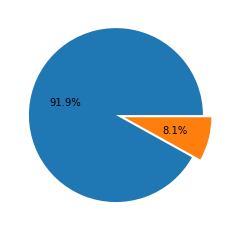

In [31]:
val = df['TARGET'].value_counts()
plt.figure(figsize=(5,4))
explode = (0,0.1)
plt.pie(val, autopct='%1.1f%%',explode=explode)

### Dealing with class imbalance

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


### One Hot Encoding

In [34]:
obj_col = df.select_dtypes(exclude='number').columns

In [35]:
obj_col

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [36]:
df = pd.get_dummies(df,obj_col)

In [37]:
df.shape

(307511, 203)

In [38]:
df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,0.018801,-9461,-637,-3648.0,...,False,False,False,False,False,False,True,False,True,False
1,100003,0,0,270000.0,1293502.5,35698.5,0.003541,-16765,-1188,-1186.0,...,False,True,False,False,False,False,False,False,True,False
2,100004,0,0,67500.0,135000.0,6750.0,0.010032,-19046,-225,-4260.0,...,False,False,False,False,False,True,False,False,True,False
3,100006,0,0,135000.0,312682.5,29686.5,0.008019,-19005,-3039,-9833.0,...,False,False,False,False,False,True,False,False,True,False
4,100007,0,0,121500.0,513000.0,21865.5,0.028663,-19932,-3038,-4311.0,...,False,False,False,False,False,True,False,False,True,False


In [39]:
df = df.drop('SK_ID_CURR', axis=1)

In [42]:
X = df.drop(['TARGET'],axis=1)
y = df['TARGET']

In [43]:
df.TARGET.unique()

array([1, 0], dtype=int64)

### Standard Scaler

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
col_scale = X.select_dtypes(include='number').columns

X[col_scale] = scaler.fit_transform(X[col_scale])

In [46]:
X.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,...,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05
mean,-3.207148e-17,-1.590866e-17,-4.074788e-17,4.741403e-17,1.592599e-16,3.364271e-17,4.789927e-17,-6.100051e-18,6.732007e-17,2.444212e-14,...,-3.306505e-17,-7.625064e-18,-1.940925e-18,8.225827e-18,5.864367e-17,2.920631e-17,-5.852814e-17,1.501907e-17,-3.060423e-17,-3.314361e-16
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-5.775378e-01,-6.036870e-01,-1.376496e+00,-1.758940e+00,-1.487798e+00,-2.106335e+00,-5.784940e-01,-5.588007e+00,-2.784328e+00,-5.545358e+02,...,-9.053411e-02,-2.440195e-02,-2.252901e-02,-1.830463e-02,-8.210023e-02,-6.795715e-02,-1.805048e-01,-3.138730e-01,-3.594746e-01,-1.092866e+00
25%,-5.775378e-01,-2.374210e-01,-8.174760e-01,-7.303015e-01,-7.853308e-01,-8.352476e-01,-4.712426e-01,-7.077673e-01,-8.644204e-01,1.803310e-03,...,-9.053411e-02,-2.440195e-02,-2.252901e-02,-1.830463e-02,-8.210023e-02,-6.795715e-02,-1.805048e-01,-3.138730e-01,-3.594746e-01,-5.176655e-01
50%,-5.775378e-01,-9.129414e-02,-2.124151e-01,-1.521775e-01,-1.459095e-01,6.576450e-02,-4.602923e-01,1.368540e-01,-1.721143e-01,1.803310e-03,...,-9.053411e-02,-2.440195e-02,-2.252901e-02,-1.830463e-02,-8.210023e-02,-6.795715e-02,-1.805048e-01,-3.138730e-01,-3.594746e-01,-3.831603e-16
75%,8.072731e-01,1.421293e-01,5.208178e-01,5.166083e-01,5.635704e-01,8.304332e-01,-4.537519e-01,8.447974e-01,8.441512e-01,1.803310e-03,...,-9.053411e-02,-2.440195e-02,-2.252901e-02,-1.830463e-02,-8.210023e-02,-6.795715e-02,-1.805048e-01,0.000000e+00,-7.516682e-17,6.327349e-01
max,2.573387e+01,4.927034e+02,8.574059e+00,1.593252e+01,3.733564e+00,1.958761e+00,2.133617e+00,1.415353e+00,1.983641e+00,1.803310e-03,...,1.104556e+01,4.098034e+01,4.438721e+01,5.463098e+01,5.121092e+01,8.730290e+01,4.184385e+01,3.137918e+01,3.530567e+02,1.328714e+01


### Minority oversampling with SMOTE

In [40]:
df.dtypes

TARGET                                                 int64
CNT_CHILDREN                                           int64
AMT_INCOME_TOTAL                                     float64
AMT_CREDIT                                           float64
AMT_ANNUITY                                          float64
REGION_POPULATION_RELATIVE                           float64
DAYS_BIRTH                                             int64
DAYS_EMPLOYED                                          int64
DAYS_REGISTRATION                                    float64
DAYS_ID_PUBLISH                                        int64
FLAG_MOBIL                                             int64
FLAG_WORK_PHONE                                        int64
FLAG_CONT_MOBILE                                       int64
FLAG_PHONE                                             int64
FLAG_EMAIL                                             int64
CNT_FAM_MEMBERS                                      float64
REGION_RATING_CLIENT    

In [47]:
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X,y)

In [48]:
y_resampled.value_counts()

TARGET
1    282686
0    282686
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x11a473c0e20>,
 [Text(6.735557395310444e-17, 1.1, ''),
  Text(-2.0206672185931328e-16, -1.1, '')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

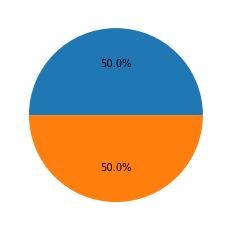

In [49]:
val = y_resampled.value_counts()
plt.pie(val,autopct='%1.1f%%')

In [50]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=42)

In [51]:
print(X_train.shape)
print(X_test.shape)

(395760, 201)
(169612, 201)


In [52]:
df.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.454517,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,...,0.089798,0.024387,0.022518,0.018299,0.077983,0.103009,0.190366,0.851923,0.738507,1.738528
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.899974
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.267395,0.265474,3.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,0.072508,-7489.000000,365243.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Building a NN Model

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import metrics,optimizers

In [62]:
model = Sequential()
model.add(Dense(units=168, activation='relu', input_dim=201))  # first layer
model.add(Dropout(0.2))

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 168)               33936     
                                                                 
 dropout_4 (Dropout)         (None, 168)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               21632     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [72]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',metrics.Recall(name='Sensitivity')])

In [56]:
X_resampled.dtypes

CNT_CHILDREN                                         float64
AMT_INCOME_TOTAL                                     float64
AMT_CREDIT                                           float64
AMT_ANNUITY                                          float64
REGION_POPULATION_RELATIVE                           float64
DAYS_BIRTH                                           float64
DAYS_EMPLOYED                                        float64
DAYS_REGISTRATION                                    float64
DAYS_ID_PUBLISH                                      float64
FLAG_MOBIL                                           float64
FLAG_WORK_PHONE                                      float64
FLAG_CONT_MOBILE                                     float64
FLAG_PHONE                                           float64
FLAG_EMAIL                                           float64
CNT_FAM_MEMBERS                                      float64
REGION_RATING_CLIENT                                 float64
HOUR_APPR_PROCESS_START 

In [64]:
X_train.shape

(395760, 201)

In [ ]:
# convert every DataFrame / Series to a clean NumPy array
X_train = X_train.to_numpy(dtype='float32')   # or .values.astype('float32')
X_test  = X_test.to_numpy(dtype='float32')

y_train = y_train.to_numpy(dtype='float32').reshape(-1, 1)  # make it (n,1)
y_test  = y_test.to_numpy(dtype='float32').reshape(-1, 1)

In [73]:
# train again
model.fit(X_train, y_train,
          batch_size=10,
          epochs=20,
          validation_data=(X_test, y_test))

Epoch 1/20
39576/39576 [==============================] - 89s 2ms/step - loss: 0.1587 - accuracy: 0.9499 - Sensitivity: 0.9035 - val_loss: 0.1494 - val_accuracy: 0.9516 - val_Sensitivity: 0.9034
Epoch 2/20
39576/39576 [==============================] - 90s 2ms/step - loss: 0.1611 - accuracy: 0.9499 - Sensitivity: 0.9034 - val_loss: 0.1498 - val_accuracy: 0.9518 - val_Sensitivity: 0.9040
Epoch 3/20
39576/39576 [==============================] - 108s 3ms/step - loss: 0.1580 - accuracy: 0.9501 - Sensitivity: 0.9040 - val_loss: 0.1506 - val_accuracy: 0.9509 - val_Sensitivity: 0.9028
Epoch 4/20
39576/39576 [==============================] - 105s 3ms/step - loss: 0.1585 - accuracy: 0.9501 - Sensitivity: 0.9037 - val_loss: 0.1517 - val_accuracy: 0.9511 - val_Sensitivity: 0.9023
Epoch 5/20
39576/39576 [==============================] - 105s 3ms/step - loss: 0.1798 - accuracy: 0.9500 - Sensitivity: 0.9034 - val_loss: 0.1500 - val_accuracy: 0.9514 - val_Sensitivity: 0.9049
Epoch 6/20
39576/39576

In [79]:
score = model.evaluate(X_test,y_test)

5301/5301 [==============================] - 7s 1ms/step - loss: 0.1498 - accuracy: 0.9517 - Sensitivity: 0.9047


In [80]:
print('Test loss : ', score[0])
print('Test Accuracy : ', score[1])
print('Test Sensitivity : ', score[2])

Test loss :  0.14977698028087616
Test Accuracy :  0.9516720771789551
Test Sensitivity :  0.9046562910079956


In [81]:
score_train = model.evaluate(X_train,y_train)

12368/12368 [==============================] - 18s 1ms/step - loss: 0.1440 - accuracy: 0.9529 - Sensitivity: 0.9063


In [82]:
print('Train loss : ', score_train[0])
print('Train Accuracy : ', score_train[1])
print('Train Sensitivity : ', score_train[2])

Train loss :  0.14402775466442108
Train Accuracy :  0.9528653621673584
Train Sensitivity :  0.9062747955322266


In [100]:
from sklearn.metrics import roc_auc_score,roc_curve

y_prob = model.predict(X_test).ravel()

5301/5301 [==============================] - 16s 3ms/step


AUC-ROC: 0.974


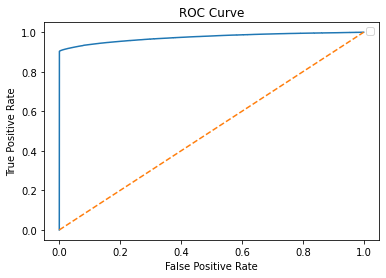

In [102]:
auc = roc_auc_score(y_test,y_prob)
print(f'AUC-ROC: {auc:.3f}')

fpr,tpr,_ = roc_curve(y_test,y_prob)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()